In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import seaborn as sns

In [138]:
df = pd.read_csv("CombinedBooksRandomized.csv")
X = df.loc[:,"Author Average Rating":"Raters"].values

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y = kmeans.fit_predict(X)
df["cluster"] = y
df


,Title,Author,Author Average Rating,Author Votes,Review Count,Distinct Works,Year,Rating,Raters,Genres,cluster
0,The Left Hand of Darkness (Paperback),Ursula K. Le Guin,4.07,1258005,85585,753,1969,4.09,155037,"Science Fiction,Fiction,Fantasy,Classics,Scien...",0
1,Wish You Were Here (Hardcover),Jodi Picoult,3.99,4447186,273761,82,2021,3.99,153115,"Fiction,Contemporary,Audiobook,Romance,Adult,A...",0
2,If I Had Your Face (Hardcover),Frances Cha,3.76,41079,5356,4,2020,3.76,41078,"Fiction,Contemporary,Literary Fiction,Adult,Fe...",0
3,I'll Be Gone in the Dark: One Woman's Obsessiv...,Michelle McNamara,4.12,210117,18190,2,2018,4.12,210038,"Nonfiction,Crime,Audiobook,Mystery,Mystery,His...",0
4,1984 (Paperback),George Orwell,4.10,8007938,201434,729,1949,4.19,4034352,"Classics,Fiction,Science Fiction,Science Ficti...",1
...,...,...,...,...,...,...,...,...,...,...,...
1723,The Bear and the Nightingale (The Winternight ...,Katherine Arden,4.23,353862,48530,14,2017,4.10,170787,"Fantasy,Historical,Fiction,Young Adult,Histori...",0
1724,Only Superhuman,Christopher L. Bennett,3.87,15137,1503,60,2012,2.86,389,"Science Fiction,Fiction,Comics,Fantasy,Sequent...",0
1725,"Delirium (Delirium, #1)",Lauren Oliver,3.88,1385551,106047,51,2011,3.96,452659,"Young Adult,Science Fiction,Romance,Science Fi...",0
1726,A Tree Grows in Brooklyn (Paperback),Betty Smith,4.28,448442,25874,15,1943,4.29,434302,"Classics,Fiction,Historical,Young Adult,Young ...",0


In [139]:
data1 = df[df.cluster == 0]
data2 = df[df.cluster == 1]
data3 = df[df.cluster == 2]
min(df["Raters"])

41

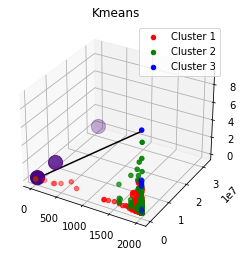

In [135]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 2023)
yline = np.linspace(0, 5)
zline = np.linspace(0, 8958054)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.Year, data1.Rating, data1.Raters, c='red', label = 'Cluster 1')
kplot.scatter3D(data2.Year,data2.Rating,data2.Raters,c ='green', label = 'Cluster 2')
kplot.scatter3D(data3.Year,data3.Rating,data3.Raters,c ='blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()

Text(0, 0.5, 'Raters')

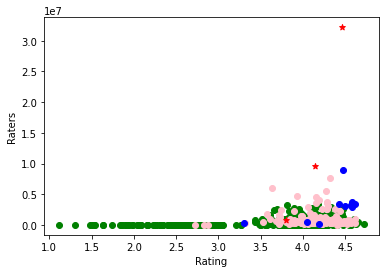

In [144]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Rating, df1.Raters, color="green")
plt.scatter(df2.Rating, df2.Raters, color="pink")
plt.scatter(df3.Rating, df3.Raters, color="blue")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'red', marker="*")
plt.xlabel("Rating")
plt.ylabel("Raters")

In [143]:
score = silhouette_score(X,y)
print(score)

0.8337589632200112
